### Problem 1: Python & Data Exploration (20 points)

In this problem, we will explore some basic statistics and visualizations of an example data set. First, download
the zip file for Homework 1, which contains some course code (the mltools directory) and the “Fisher iris” data
set, and load the latter into Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns

The Iris data consist of four real-valued features used to predict which of three types of iris flower was measured
(a three-class classification problem).
1. Use X.shape to get the number of features and the data points. Report both numbers, mentioning which
number is which. (5 points)
2. For each feature, plot a histogram ( plt.hist ) of the data values (5 points)
3. Compute the mean & standard deviation of the data points for each feature ( np.mean , np.std ) (5 points)
4. For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot (see plt.plot or plt.scatter ) of the
feature values, colored according to their target value (class). (For example, plot all data points with y = 0
as blue, y = 1 as green, etc.) (5 points)

In [2]:
# 1
print("the number of features is", X.shape[1])
print("the number of data points is", X.shape[0])

the number of features is 4
the number of data points is 148


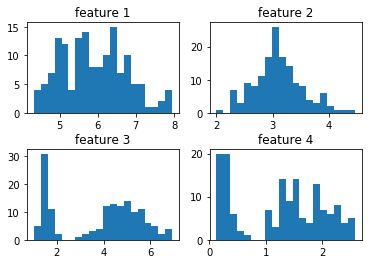

In [3]:
# 2
fig,[[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2)

# feature 1
ax0.hist(X[:, 0], 20)
ax0.set_title("feature 1")

# feature 2
ax1.hist(X[:, 1], 20)
ax1.set_title("feature 2")

# feature 3
ax2.hist(X[:, 2], 20)
ax2.set_title("feature 3")

# feature 4
ax3.hist(X[:, 3], 20)
ax3.set_title("feature 4")

fig.subplots_adjust(hspace=0.4)
plt.show()

In [4]:
# 3
def print_mean_and_std(): 
    for i in range(X.shape[1]):
        print("the mean of feature %d is " %(i + 1), np.mean(X[:, i]))
        print("the standard deviation of feature %d is " %(i + 1), np.std(X[:, i]))

print_mean_and_std()

the mean of feature 1 is  5.900103764189188
the standard deviation of feature 1 is  0.833402066774894
the mean of feature 2 is  3.098930916891892
the standard deviation of feature 2 is  0.43629183800107685
the mean of feature 3 is  3.8195548405405404
the standard deviation of feature 3 is  1.7540571093439352
the mean of feature 4 is  1.2525554845945945
the standard deviation of feature 4 is  0.7587724570263247


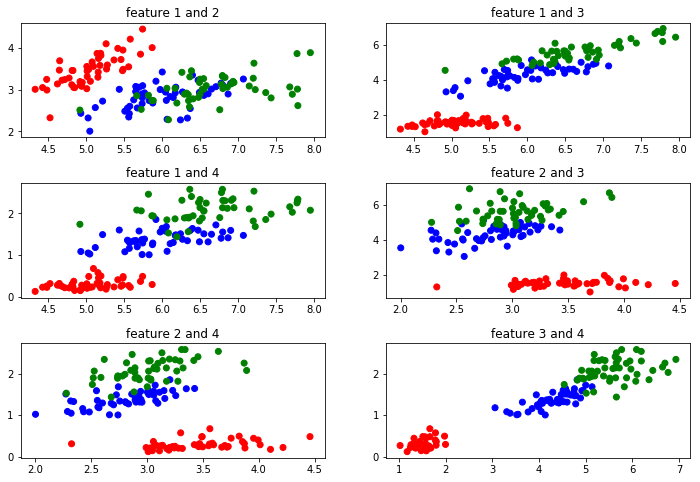

In [5]:
# 4
def plot_two_feature_scatter(ax, n1, n2):
    ax.scatter(X[:, n1 - 1], X[:, n2 - 1], c = color)  
    ax.set_title("feature %d and %d" %(n1, n2))

def get_colors():
    color = []
    for i in range(X.shape[0]):
        if Y[i] == 0: color.append('r')
        elif Y[i] == 1: color.append('b')
        elif Y[i] == 2: color.append('g')
    return color

def plot():
    fig,[[ax0, ax1], [ax2, ax3], [ax4, ax5]] = plt.subplots(3, 2, figsize=(12, 8))
    plot_two_feature_scatter(ax0, 1, 2)
    plot_two_feature_scatter(ax1, 1, 3)
    plot_two_feature_scatter(ax2, 1, 4)
    plot_two_feature_scatter(ax3, 2, 3)
    plot_two_feature_scatter(ax4, 2, 4)
    plot_two_feature_scatter(ax5, 3, 4)
    fig.subplots_adjust(hspace=0.4)
    plt.show()

color = get_colors()    
plot()

### Problem 2: kNN predictions (25 points)
In this problem, you will continue to use the Iris data and explore a KNN classifier using provided knnClassify
python class. While doing the problem, please explore the implementation to become familiar with how it works.
First, we will shuffle and split the data into training and validation subsets:

In [6]:
import mltools as ml
np.random.seed(0)

iris = np.genfromtxt("data/iris.txt", delimiter=None) # load the data

1. Modify the code listed above to use only the first two features of X (e.g., let X be only the first two columns
of iris , instead of the first four), and visualize (plot) the classification boundary for varying values of
K = [1, 5, 10, 50] using plotClassify2D . (10 points)
2. Again using only the first two features, compute the error rate (number of misclassifications) on both the
training and validation data as a function of K = [1, 2, 5, 10, 50, 100, 200]. You can do this most easily with
a for-loop:
Plot the resulting error rate functions using a semi-log plot ( semilogx ), with training error in red and
validation error in green. Based on these plots, what value of K would you recommend? (10 points)
3. Provide the same plots as the previous, but with all the features in the dataset. Are the plots very different?
Is your recommendation different? (5 points)

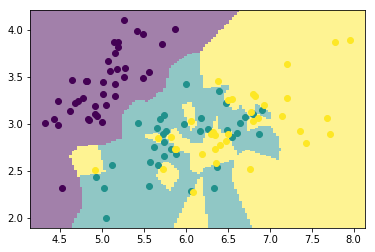

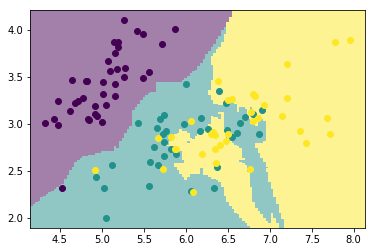

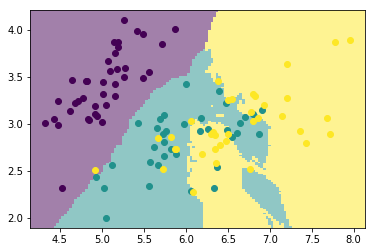

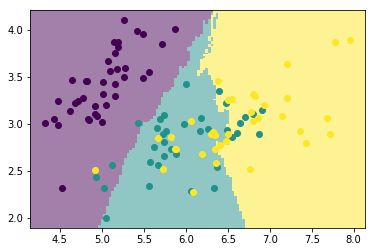

In [7]:
# 1
Y = iris[:,-1]
X = iris[:,0:-1]

X,Y = ml.shuffleData(X, Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X, Y, 0.75)

for K in [1,5,10,50]:
    knn = ml.knn.knnClassify(Xtr[:,0:2], Ytr, K)
    ml.plotClassify2D(knn, Xtr[:,0:2], Ytr)

In [8]:
def predict(Xtr, Xva):
    K = [1,2,5,10,50,100,200];
    errTrain = np.zeros(7)
    errVali = np.zeros(7)
    for i,k in enumerate(K):
        learner = ml.knn.knnClassify(Xtr, Ytr, k)
        Yhat_tr = learner.predict(Xtr)
        Yhat_va = learner.predict(Xva)
        errTrain[i] = (np.sum(Yhat_tr != Ytr)) / len(Ytr)
        errVali[i] = (np.sum(Yhat_va != Yva)) / len(Yva)
    plt.semilogx(K, errTrain, c='r')
    plt.semilogx(K, errVali, c='g')
    plt.xticks(K, K)
    plt.show()

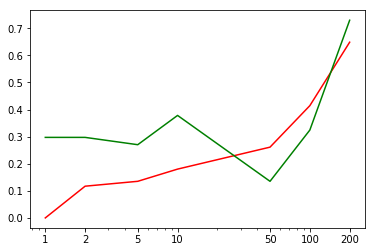

In [9]:
# 2 
predict(Xtr[:,0:2], Xva[:,0:2])

In the plot above, I would recommend 50 as the K value. The reason is simple, because in 50, the validation error is lowest and also the training error is not too high.

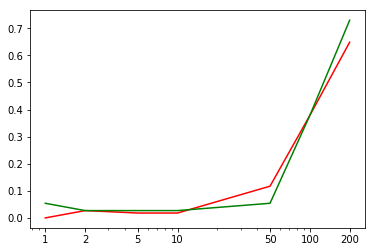

In [10]:
# 3
predict(Xtr, Xva)

In the plot above, I still would recommend 50 as the K value. Because at 50, the validation error and the training error are both lowest.

### Problem 3: Naïve Bayes Classifiers (45 points)
In order to reduce my email load, I decide to implement a machine learning algorithm to decide whether or
not I should read an email, or simply file it away instead. To train my model, I obtain the following data set of
binary-valued features about each email, including whether I know the author or not, whether the email is long or
short, and whether it has any of several key words, along with my final decision about whether to read it ( y = +1
for “read”, y = −1 for “discard”).
<img src="p3.jpg" width="500px" height="500px"></img>
In the case of any ties, we will prefer to predict class +1.
I decide to try a naïve Bayes classifier to make my decisions and compute my uncertainty.
1. Compute all the probabilities necessary for a naïve Bayes classifier, i.e., the class probability p( y) and all the
individual feature probabilities p(xi
| y), for each class y and feature xi
(10 points)
2. Which class would be predicted for x = (0 0 0 0 0)? What about for x = (1 1 0 1 0)? (10 points)
3. Compute the posterior probability that y = +1 given the observation x = (1 1 0 1 0). (5 points)
4. Why should we probably not use a “joint” Bayes classifier (using the joint probability of the features x, as
opposed to a naïve Bayes classifier) for these data? (10 points)
5. Suppose that, before we make our predictions, we lose access to my address book, so that we cannot tell
whether the email author is known. Should we re-train the model, and if so, how? (e.g.: how does the
model, and its parameters, change in this new situation?) Hint: what will the naïve Bayes model over only
features x2
. . . x5
look like, and what will its parameters be? (10 points)

### 1

<table>
  <tr>
    <th>index</th>
    <th>P(xi = 0|y = 1)</th>
    <th>P(xi = 1|y = 1)</th>
    <th>P(xi = 0|y = -1)</th>
    <th>P(xi = 1|y = -1)</th>
  </tr>
  <tr>
    <td>1</td>
    <td>1/4</td>
    <td>3/4</td>
    <td>1/2</td>
    <td>1/2</td>
  </tr>
  <tr>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>1/6</td>
    <td>5/6</td>
  </tr>
  <tr>
    <td>3</td>
    <td>1/4</td>
    <td>3/4</td>
    <td>1/3</td>
    <td>2/3</td>
  </tr>
  <tr>
    <td>4</td>
    <td>1/2</td>
    <td>1/2</td>
    <td>1/6</td>
    <td>5/6</td>
  </tr>
  <tr>
    <td>5</td>
    <td>3/4</td>
    <td>1/4</td>
    <td>2/3</td>
    <td>1/3</td>
  </tr>
</table>

<table>
  <tr>
    <th>P(y = 1)</th>
    <th>P(y = -1)</th>
  </tr>
  <tr>
    <td>2/5</td>
    <td>3/5</td>
  </tr>
</table>

### 2  

#### (1) For x = (0 0 0 0 0)
P(y = 1, x = (0, 0, 0, 0, 0))

= P(y = 1) * P(x = (0, 0, 0, 0, 0))

= P(y = 1) * P(x1 = 0 | y = 1) * P(x2 = 0 | y = 1) * P(x3 = 0 | y = 1) * P(x4 = 0 | y = 1) * P(x5 = 0 | y = 1)

= 2/5 * 1/4 * 1 * 1/4 * 1/2 * 3/4

= 0.009375

P(y = -1, x = (0, 0, 0, 0, 0))

= P(y = -1) * P(x = (0, 0, 0, 0, 0))

= P(y = -1) * P(x1 = 0 | y = -1) * P(x2 = 0 | y = -1) * P(x3 = 0 | y = -1) * P(x4 = 0 | y = -1) * P(x5 = 0 | y = -1)

= 3/5 * 1/2 * 1/6 * 1/3 * 1/6 * 2/3

= 0.00185185

P(y = 1, x = (0, 0, 0, 0, 0)) > P(y = -1, x = (0, 0, 0, 0, 0))

**For x = (0 0 0 0 0), y is more possible to be 1**

#### (2) For x = (1 1 0 1 0)

Similarly, 

P(y = 1, x = (1, 1, 0, 1, 0)) = 0

P(y = -1, x = (1, 1, 0, 1, 0)) = 0.46296

**For x = (0 0 0 0 0), y is more possible to be -1**

### 3

P(y = 1 | x = (1, 1, 0, 1, 0)) = P(y = 1, x = (1, 1, 0, 1, 0)) / P(x = (1, 1, 0, 1, 0)) = 0

**The posterior probability that y = +1 given the observation x = (1 1 0 1 0) should be 0**

### 4

Using joint Bayes classifier means we need to store much information in our table. For example, if we have n features from x1 to xn, and we think all the feature as joint. So we totally have 2^n possibility to store in table. That is huge information when n is very large. And also, we should not think all the feature all are related, in fact, most of them are independent, so naive Bayes classifier is much more reasonable in most cases.

### 5

No need to retrain. All the features in Naive Bayes classifier are independent. So we can just use other features to make prediction. For example, if we lose feature x1, we can just use x2 - x5 to make prediction. We use 4 \* 4 = 16 (except x1 feature) given possibilities instead of 4 \* 5 = 20. 

### Statement of Collaboration

**I did my homeword independently.**